In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# m1

In [5]:
import pandas as pd
import numpy as np
#训练数据加载
data1 = pd.read_csv("lday1.csv", header=None)
data2 = pd.read_csv("lday2.csv", header=None)
data3 = pd.read_csv("lday3.csv", header=None)
data4 = pd.read_csv("lday4.csv", header=None)
x1 = data1.values[1:, 4:]
x2 = data2.values[1:, 4:]
x3 = data3.values[1:, 4:]
x4 = data4.values[1:, 4:]
Y1 = data1.values[1:, 2]
Y2 = data2.values[1:, 2]
Y3 = data3.values[1:, 2]
Y4 = data4.values[1:, 2]

In [3]:
from BaselineRemoval import BaselineRemoval
from scipy.signal import savgol_filter
import copy
def STD(a, windosize, n):

    #for i in range(time):
        output = []
        for i in range(len(a)):
            


            if i < windosize:
                output = np.append(output, a[i])

            elif i > len(a)-windosize-1:
                output = np.append(output, a[i])

            else:
                pl = a[i-windosize:i+windosize+1] 
                median = np.median(pl, axis=0)
                mean = np.mean(pl, axis=0)
                std = np.std(pl)
                max_range = median + n*std 
                min_range = median - n*std

                if a[i] > max_range:
                    max_range = median + n*std *0.01
                    output = np.append(output, max_range)

                elif a[i] < min_range:
                    min_range = median - n*std*0.01
                    output = np.append(output, min_range)

                else:
                    output = np.append(output, a[i])

            #a = output
        return(output)

def bs(X, deriv = 0):
    '''
    deriv变量为求导阶数
    ''' 
    test = copy.deepcopy(X[:, 40:600])

    for i in range(test.shape[0]):

        test_std = STD(test[i, :], 3, 1.5)
        test_fit = savgol_filter(test_std, 7, 5, deriv)
        base = BaselineRemoval(test_fit)
        test[i] = base.ZhangFit(28)
        test[i] = (test[i]/np.max(test[i,120:160]))*100
    return test
# def normal(X, deriv = 0 ):
#     '''
#     deriv变量为求导阶数
#     ''' 
#     test = copy.deepcopy(X)

#     for i in range(test.shape[0]):
#         #test_std = STD(test[i, :], 3, 1.5)
#         #test_fit = savgol_filter(test[i, :], 1, 1, deriv)

#         test[i] = (test[i]/np.max(test[i,120:160]))*100
#     return test

    '''
    deriv变量为求导阶数
    ''' 
    test = copy.deepcopy(X)

    for i in range(test.shape[0]):
        #test_std = STD(test[i, :], 3, 1.5)
        #test_fit = savgol_filter(test[i, :], 1, 1, deriv)

        test[i] = (test[i]/np.max(test[i,120:160]))*100
    return test

In [6]:
X1 = bs(x1)
X2 = bs(x2)
X3 = bs(x3)
X4 = bs(x4)

In [7]:
def get_model(X, Y):    
    X_train,X_test,y_train, y_test = train_test_split(X, Y) 
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.1,
                    max_depth = 5, alpha = 5, n_estimators = 400, random_state=1024)
    xg_reg.fit(X_train, y_train,eval_set = [(X_test, y_test)],early_stopping_rounds=50)
    return xg_reg

In [8]:
m1 = get_model(X1, Y1)

[0]	validation_0-rmse:43.63132
[1]	validation_0-rmse:39.42457
[2]	validation_0-rmse:35.65162
[3]	validation_0-rmse:32.24493
[4]	validation_0-rmse:29.19809
[5]	validation_0-rmse:26.44141
[6]	validation_0-rmse:23.95328
[7]	validation_0-rmse:21.68604
[8]	validation_0-rmse:19.65350
[9]	validation_0-rmse:17.84040
[10]	validation_0-rmse:16.23120
[11]	validation_0-rmse:14.87082
[12]	validation_0-rmse:13.54300
[13]	validation_0-rmse:12.33176
[14]	validation_0-rmse:11.29305
[15]	validation_0-rmse:10.39386
[16]	validation_0-rmse:9.54690
[17]	validation_0-rmse:8.84513
[18]	validation_0-rmse:8.26632
[19]	validation_0-rmse:7.72243
[20]	validation_0-rmse:7.17781
[21]	validation_0-rmse:6.67490
[22]	validation_0-rmse:6.28416
[23]	validation_0-rmse:5.89674
[24]	validation_0-rmse:5.58271
[25]	validation_0-rmse:5.28124
[26]	validation_0-rmse:5.02833
[27]	validation_0-rmse:4.85190
[28]	validation_0-rmse:4.67393
[29]	validation_0-rmse:4.52467
[30]	validation_0-rmse:4.37957
[31]	validation_0-rmse:4.26914
[3

# T1

In [9]:
data_u1 = pd.read_csv("DAY1.csv")
u1 = data_u1.drop(["wavenumbers"], axis=1).values
U1 = bs(u1)
# from sklearn.decomposition import PCA
# pca = PCA(100)
# U1 = pca.fit_transform(U1)
Ux1 = np.concatenate((U1[1:-1], U1[:-2]), axis=-1)
Uy1 = U1[2:]

In [10]:
# def get_T(X, Y):    
#     X_train,X_test,y_train, y_test = train_test_split(X, Y) 
#     xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.1,
#                     max_depth = 5, alpha = 5, n_estimators = 400, random_state=1024)
#     xg_reg.fit(X_train, y_train,eval_set = [(X_test, y_test)],early_stopping_rounds=3)
#     return xg_reg
from sklearn.cross_decomposition import PLSRegression
def get_T(Ux, Uy):   
    pls = PLSRegression(n_components=20)
    X_train,X_test,y_train, y_test = train_test_split(Ux, Uy) 
    pls.fit(X_train, y_train)
    print(pls.score(X_test, y_test))
    return pls

In [11]:
T1 = get_T(Ux1, Uy1)

0.33167739689990416


# detal2

In [13]:
data_u2 = pd.read_csv("DAY2.csv")
data2 = pd.read_csv("lday2.csv")

In [14]:
t_idx = []
for t in data2["0"].values:
    t_idx.append(np.where(data_u2["wavenumbers"].values==t)[0])
t_idx = np.array(t_idx).reshape(-1)

In [15]:
U2 = bs(data_u2.drop(["wavenumbers"], axis=1).values)
# U2 = pca.transform(U2)

In [16]:
X2_pre = np.concatenate((U2[t_idx-1], U2[t_idx-2]), axis=-1)
detal2 = T1.predict(X2_pre)-X2

# f

In [18]:
label = Y2.astype(float)-m1.predict(X2)

In [19]:
input = detal2

In [20]:
def get_f(X, Y):    
    X_train,X_test,y_train, y_test = train_test_split(X, Y) 
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.1,
                    max_depth = 5, alpha = 5, n_estimators = 400, random_state=1024)
    xg_reg.fit(X_train, y_train,eval_set = [(X_test, y_test)],early_stopping_rounds=50)
    return xg_reg

In [21]:
f = get_f(input, label)

[0]	validation_0-rmse:27.75835
[1]	validation_0-rmse:25.25040
[2]	validation_0-rmse:23.03163
[3]	validation_0-rmse:21.05282
[4]	validation_0-rmse:19.23960
[5]	validation_0-rmse:17.71476
[6]	validation_0-rmse:16.40726
[7]	validation_0-rmse:15.23594
[8]	validation_0-rmse:14.28740
[9]	validation_0-rmse:13.43423
[10]	validation_0-rmse:12.73367
[11]	validation_0-rmse:12.22990
[12]	validation_0-rmse:11.78082
[13]	validation_0-rmse:11.32484
[14]	validation_0-rmse:10.98864
[15]	validation_0-rmse:10.66212
[16]	validation_0-rmse:10.45018
[17]	validation_0-rmse:10.22344
[18]	validation_0-rmse:10.02085
[19]	validation_0-rmse:9.83913
[20]	validation_0-rmse:9.74638
[21]	validation_0-rmse:9.64147
[22]	validation_0-rmse:9.60180
[23]	validation_0-rmse:9.56618
[24]	validation_0-rmse:9.52097
[25]	validation_0-rmse:9.50673
[26]	validation_0-rmse:9.48863
[27]	validation_0-rmse:9.45048
[28]	validation_0-rmse:9.42333
[29]	validation_0-rmse:9.40526
[30]	validation_0-rmse:9.38996
[31]	validation_0-rmse:9.37249

# m2

In [22]:
def m2(x, x_pre1, x_pre2):
    # x_pre1 = pca.transform(x_pre1)
    # x_pre2 = pca.transform(x_pre2)
    x_pre = np.concatenate((x_pre1, x_pre2), axis=-1)
    detal = T1.predict(x_pre) - x
    return m1.predict(x) + f.predict(detal)

# def m2(x, x_pre1, x_pre2):
#     return m1.predict(x)

In [23]:
def get_detal(x, x_pre1, x_pre2):
    # x_pre1 = pca.transform(x_pre1)
    # x_pre2 = pca.transform(x_pre2)
    x_pre = np.concatenate((x_pre1, x_pre2), axis=-1)
    detal = T1.predict(x_pre) - x#pca.transform(x)
    return detal

# test

In [24]:
t_idx = []
for t in data2["0"].values:
    t_idx.append(np.where(data_u2["wavenumbers"].values==t)[0])
t_idx = np.array(t_idx).reshape(-1)
X2_pre1 = U2[t_idx-1]
X2_pre2 = U2[t_idx-2]
pred2 = m2(X2, X2_pre1, X2_pre2)

In [32]:
data1 = pd.read_csv("lday1.csv")
t_idx = []
for t in data1["0"].values:
    t_idx.append(np.where(data_u1["wavenumbers"].values==t)[0])
t_idx = np.array(t_idx).reshape(-1)
X1_pre1 = U1[t_idx-1]
X1_pre2 = U1[t_idx-2]
pred1 = m2(X1[:-1], X1_pre1[:-1], X1_pre2[:-1])

In [33]:
data4 = pd.read_csv("lday4.csv")
data_u4 = pd.read_csv("DAY4.csv")
U4 = bs(data_u4.drop(["wavenumbers"], axis=1).values)
t_idx = []
for t in data4["0"].values:
    t_idx.append(np.where(data_u4["wavenumbers"].values==t)[0])
t_idx = np.array(t_idx).reshape(-1)
X4_pre1 = U4[t_idx-1]
X4_pre2 = U4[t_idx-2]

In [34]:
pred4 = m2(X4, X4_pre1, X4_pre2)

In [35]:
data3 = pd.read_csv("lday3.csv")
data_u3 = pd.read_csv("DAY3.csv")
U3 = bs(data_u3.drop(["wavenumbers"], axis=1).values)
t_idx = []
for t in data3["0"].values:
    t_idx.append(np.where(data_u3["wavenumbers"].values==t)[0])
t_idx = np.array(t_idx).reshape(-1)
X3_pre1 = U3[t_idx-1]
X3_pre2 = U3[t_idx-2]

pred3 = m2(X3, X3_pre1, X3_pre2)
detal3 = get_detal(X3, X3_pre1, X3_pre2)
detal2 = get_detal(X2, X2_pre1, X2_pre2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


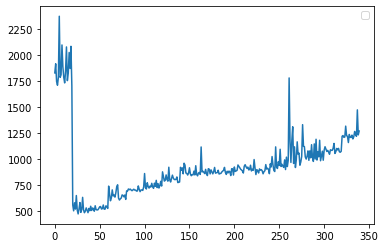

In [42]:
import matplotlib.pyplot as plt
detal = detal2
plt.rcParams['figure.figsize'] = (50.0, 10.0) 
plt.plot(np.sum(detal*detal, axis=-1)**0.5)
plt.legend(fontsize=10)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


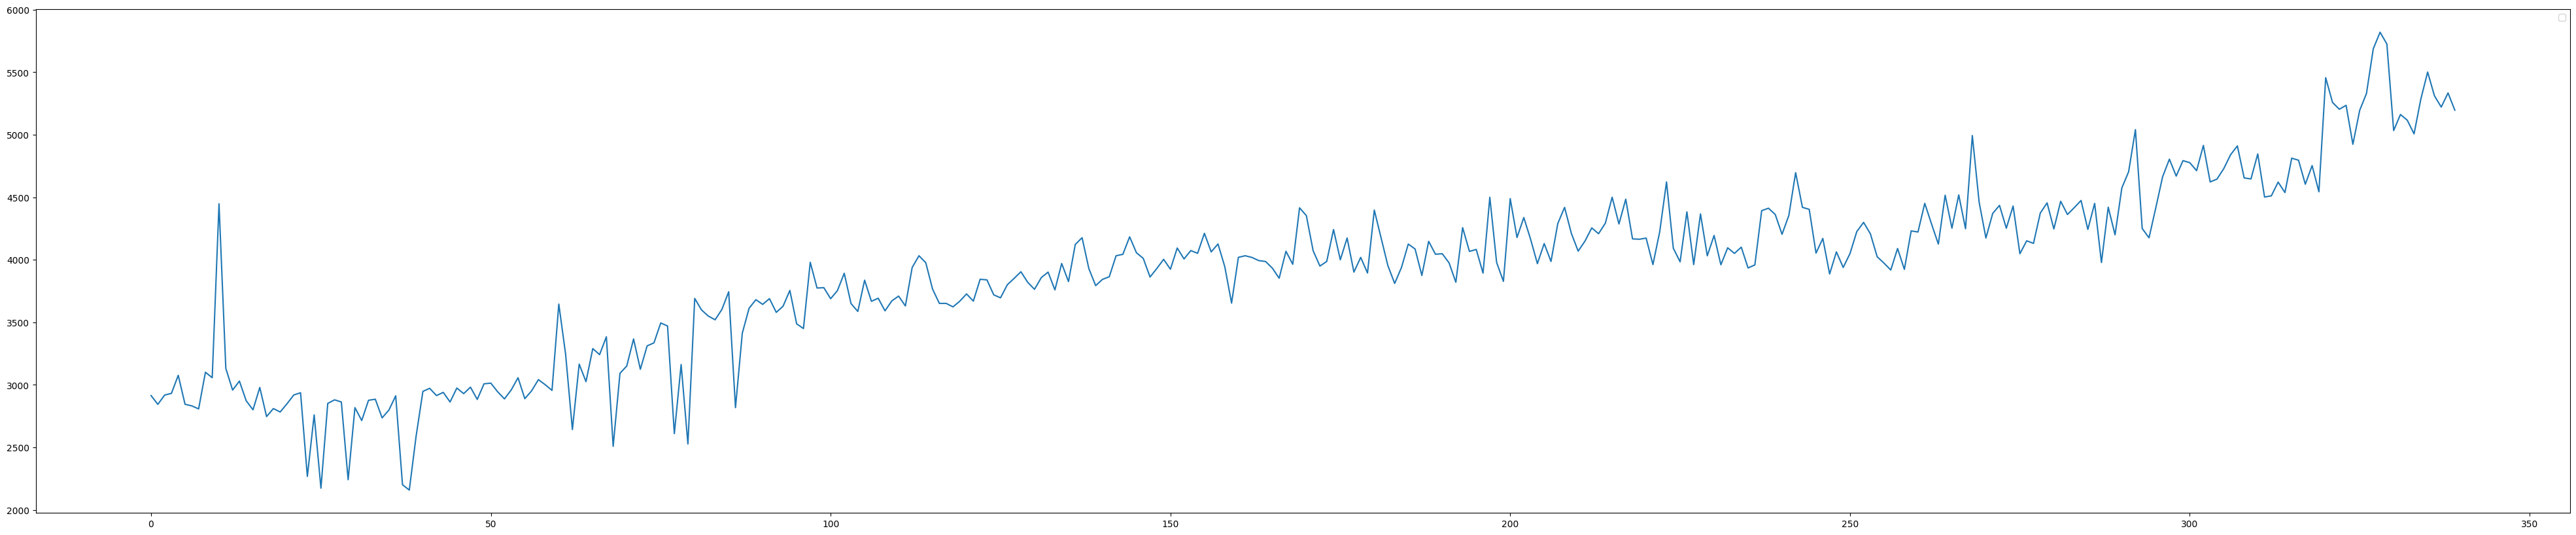

In [36]:
import matplotlib.pyplot as plt
detal = detal2
plt.rcParams['figure.figsize'] = (50.0, 10.0) 
plt.plot(np.sum(detal*detal, axis=-1)**0.5)
plt.legend(fontsize=10)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


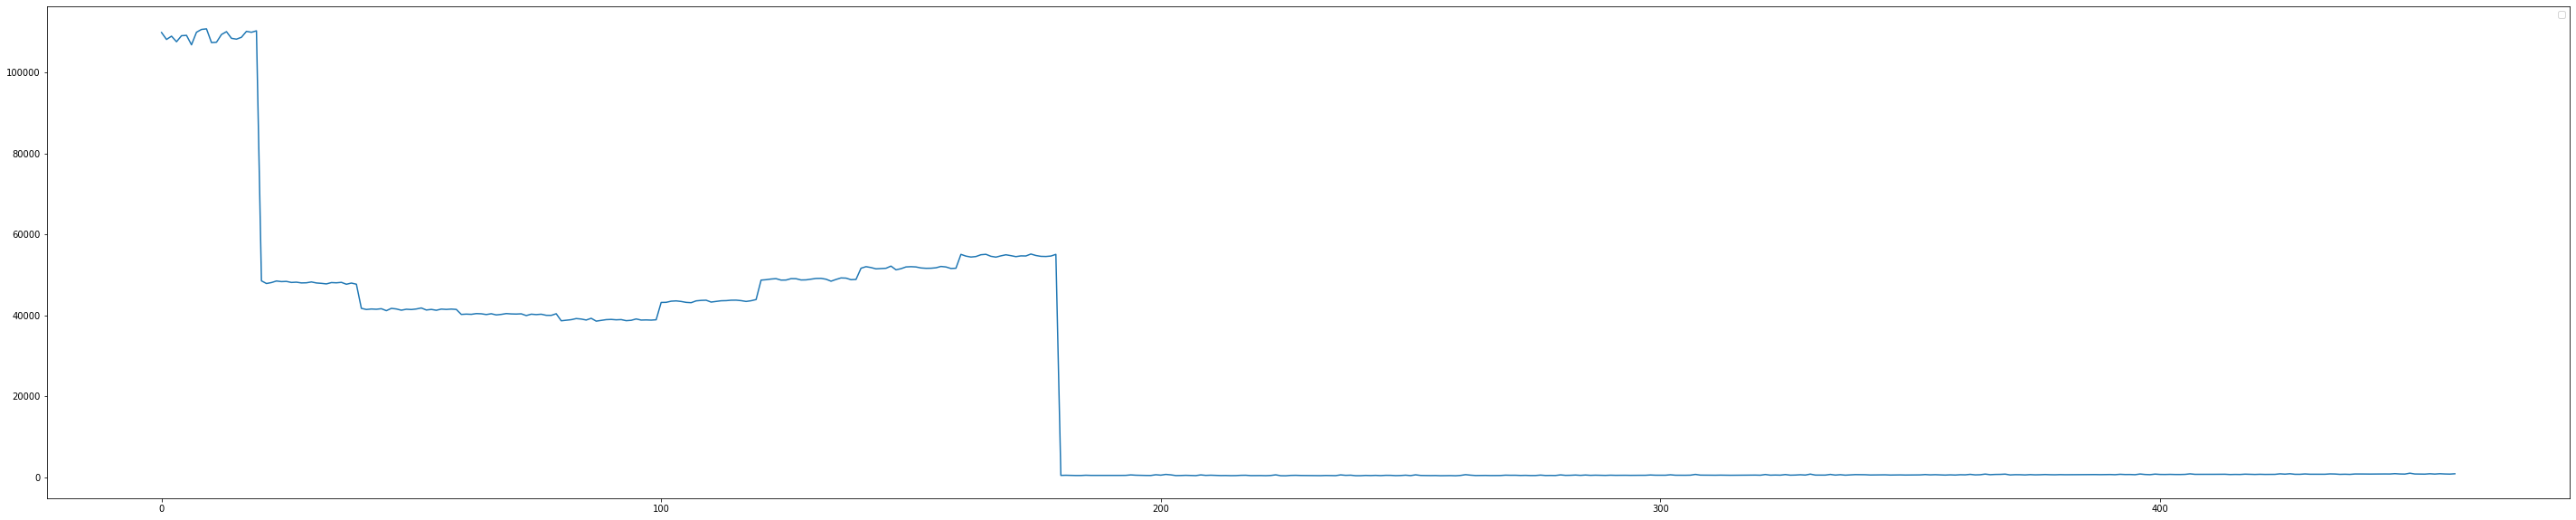

In [43]:
import matplotlib.pyplot as plt
detal = detal3
plt.rcParams['figure.figsize'] = (50.0, 10.0) 
plt.plot(np.sum(detal*detal, axis=-1)**0.5)
plt.legend(fontsize=10)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


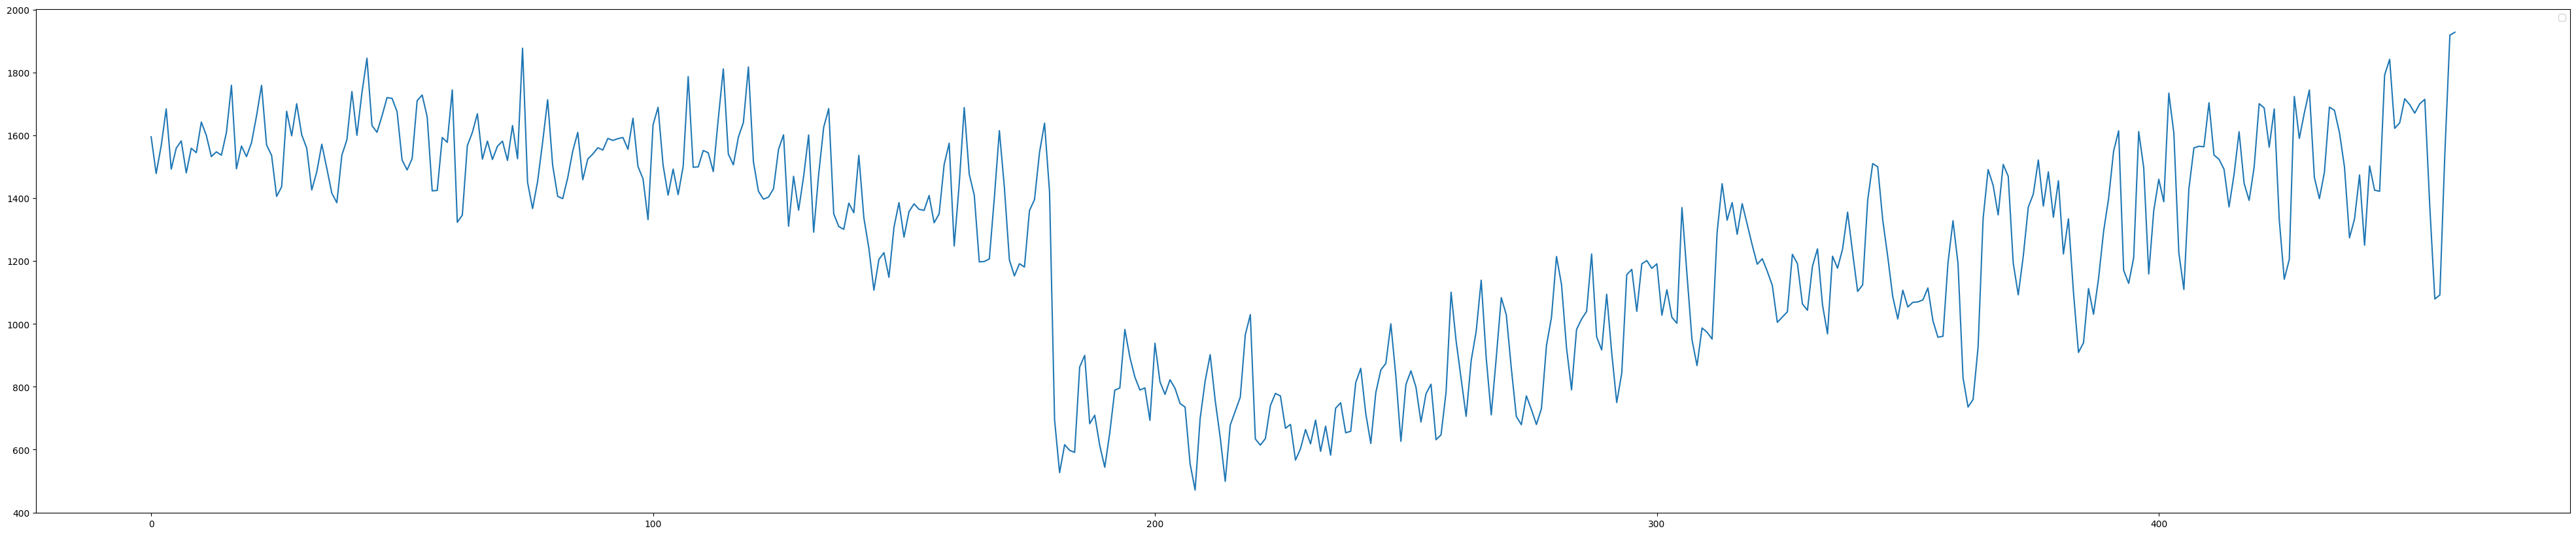

In [37]:
import matplotlib.pyplot as plt
detal = detal3
plt.rcParams['figure.figsize'] = (50.0, 10.0) 
plt.plot(np.sum(detal*detal, axis=-1)**0.5)
plt.legend(fontsize=10)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


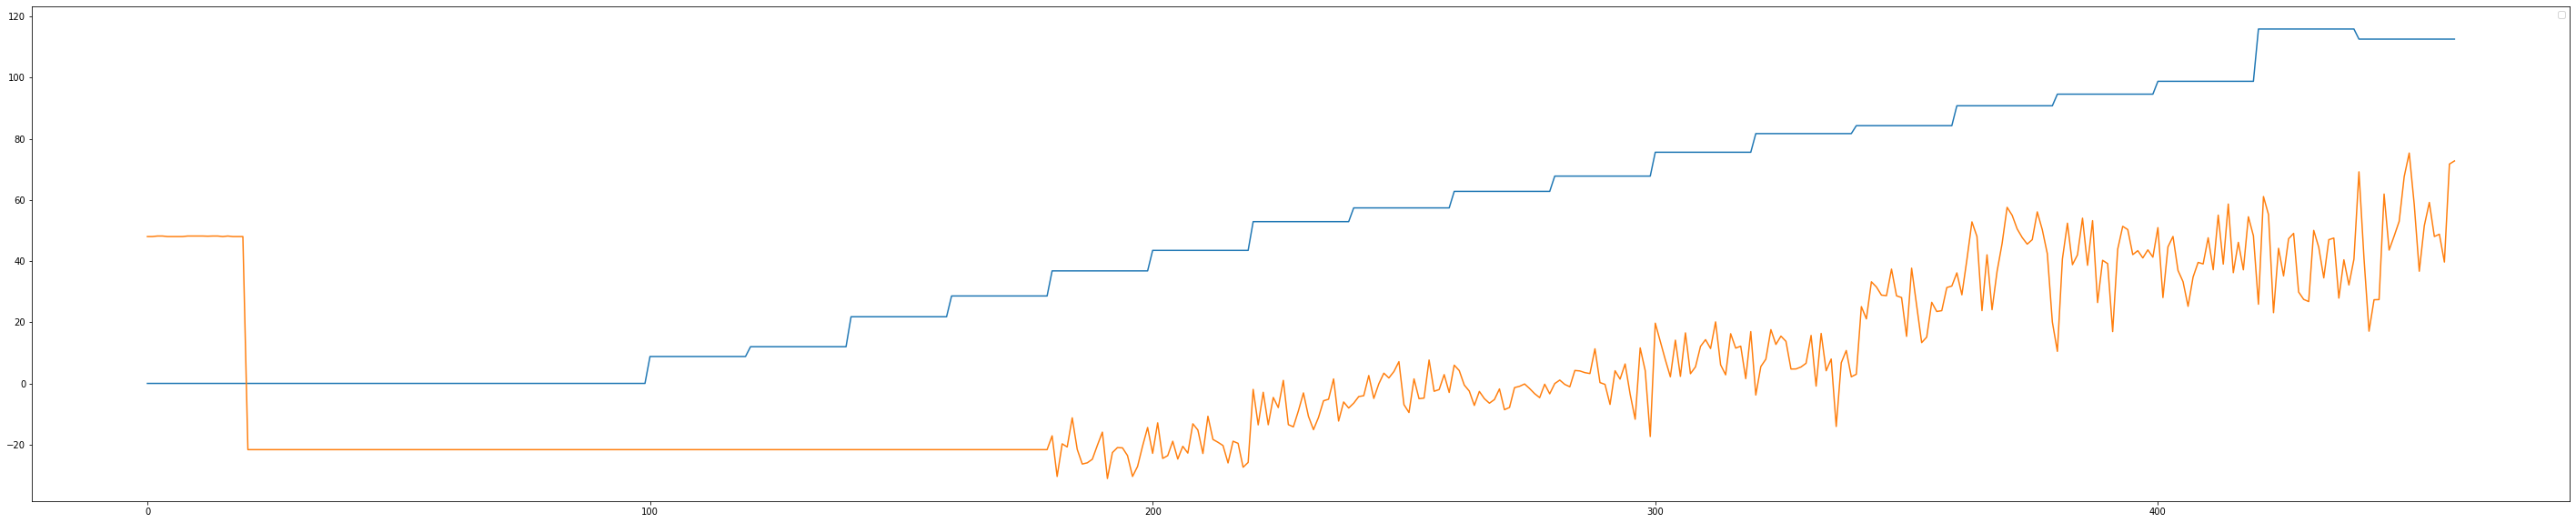

In [44]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (50.0, 10.0) 
plt.plot(Y3)
plt.plot(pred3)
plt.legend(fontsize=10)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


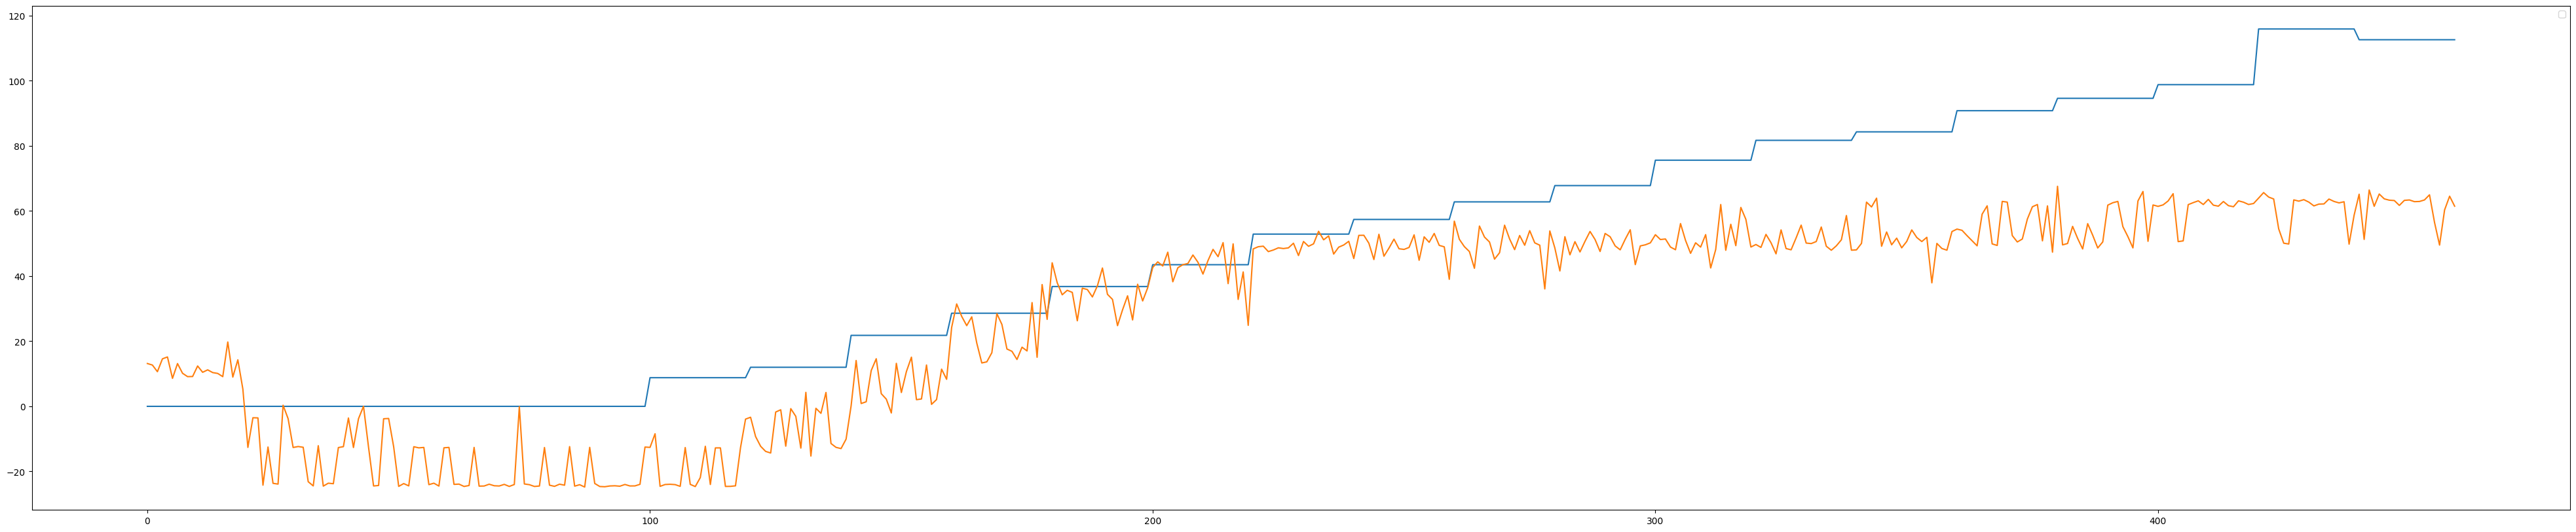

In [39]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (50.0, 10.0) 
plt.plot(Y3.astype(float))
plt.plot(pred3)
plt.legend(fontsize=10)
plt.show()

In [40]:
np.sum((Y3.astype(float)-pred3)**2, axis=-1)**0.5

576.5957098487063

In [41]:
np.sum((Y3.astype(float)-pred3)**2, axis=-1)**0.5

576.5957098487063

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


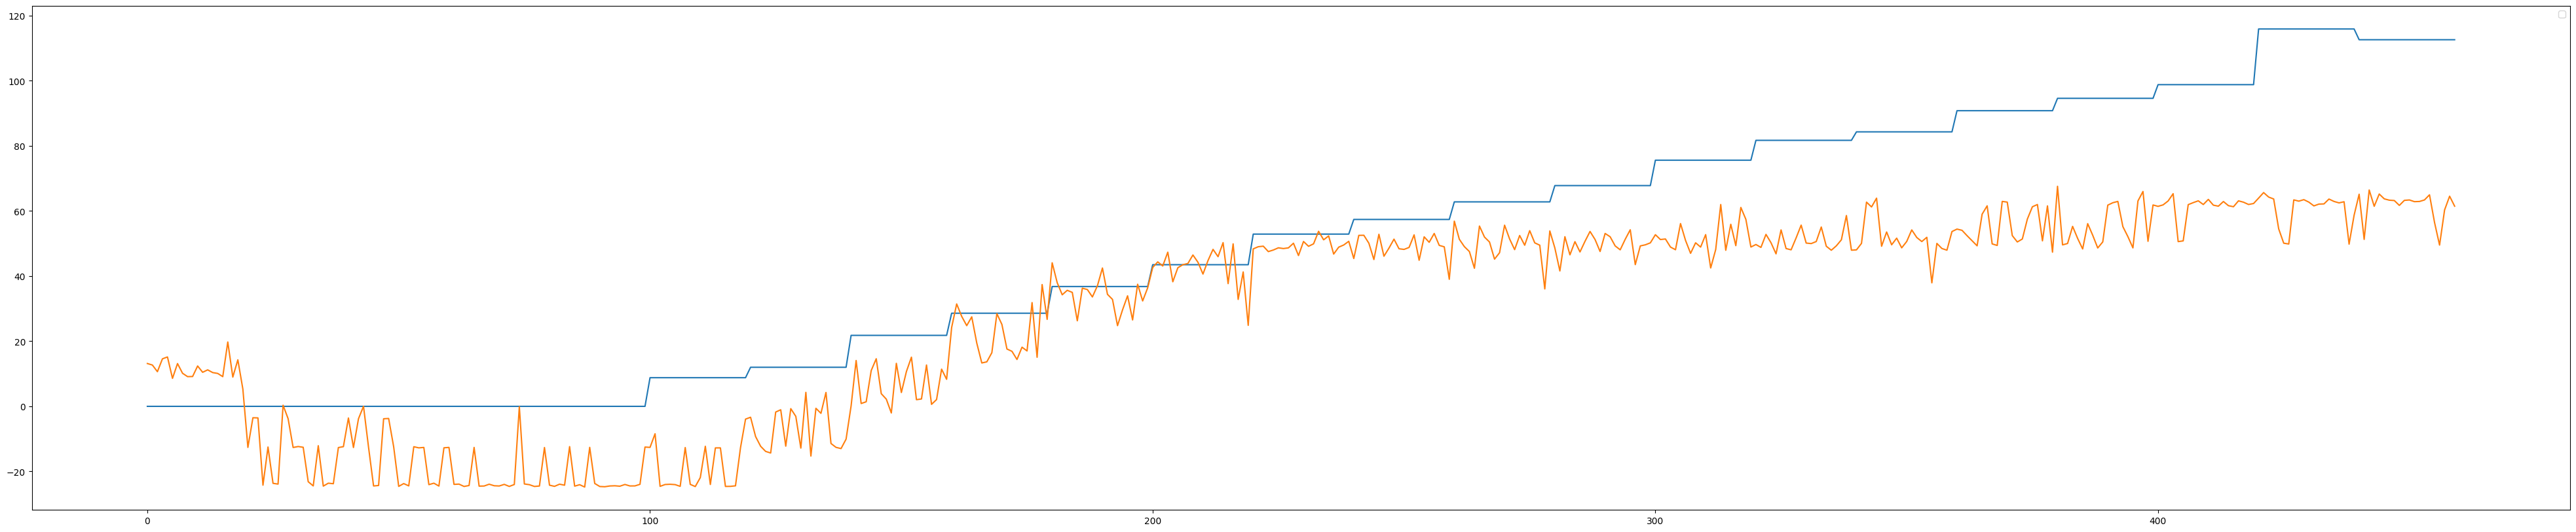

In [42]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (50.0, 10.0) 
plt.plot(Y3.astype(float))
plt.plot(pred3)
plt.legend(fontsize=10)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


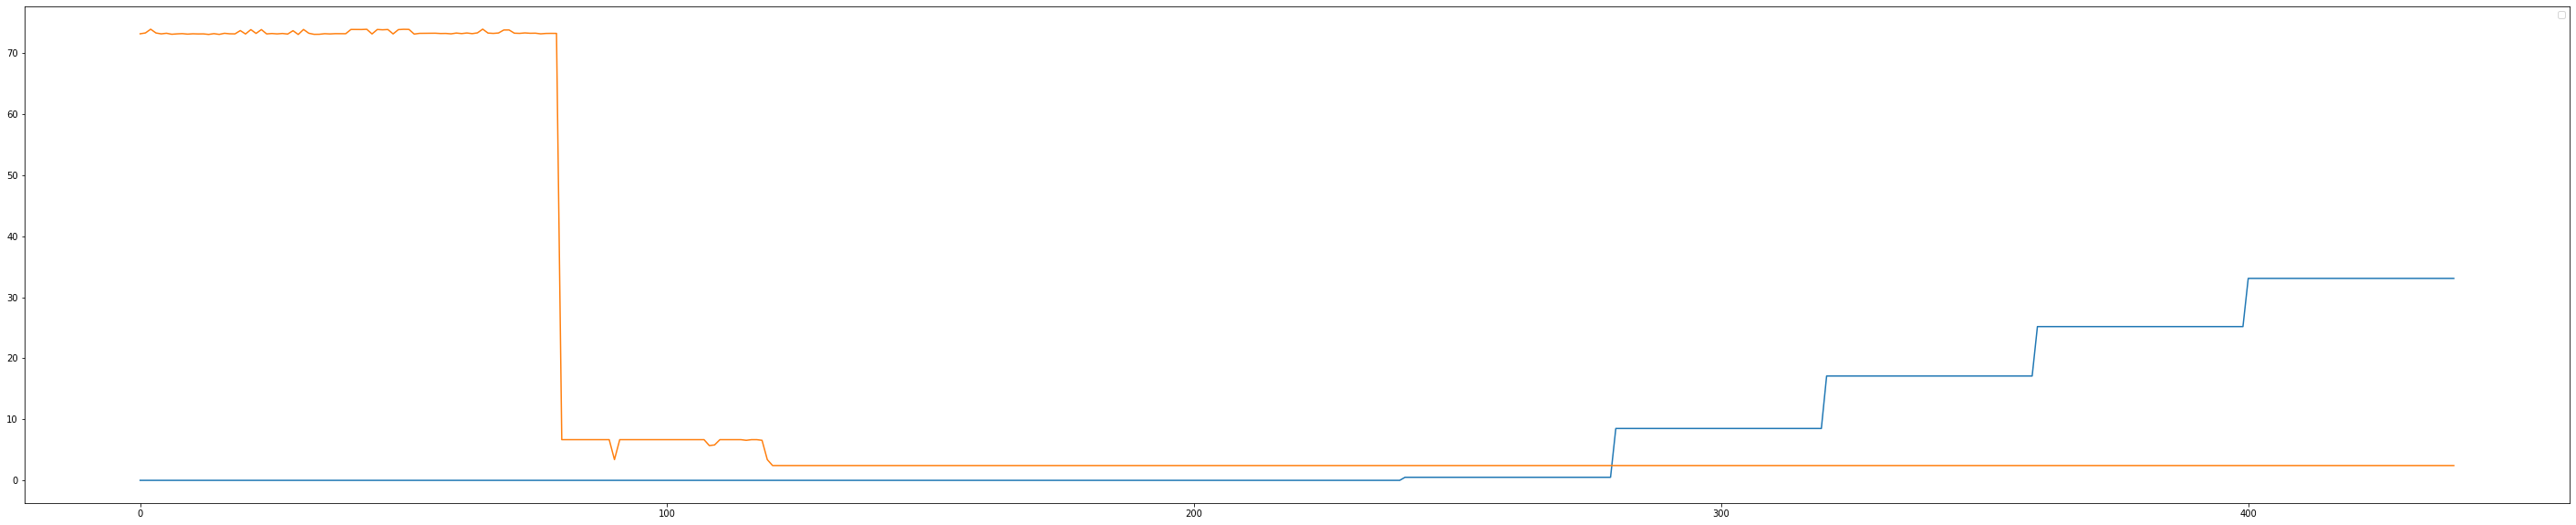

In [150]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (50.0, 10.0) 
plt.plot(Y4)
plt.plot(pred4)
plt.legend(fontsize=10)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


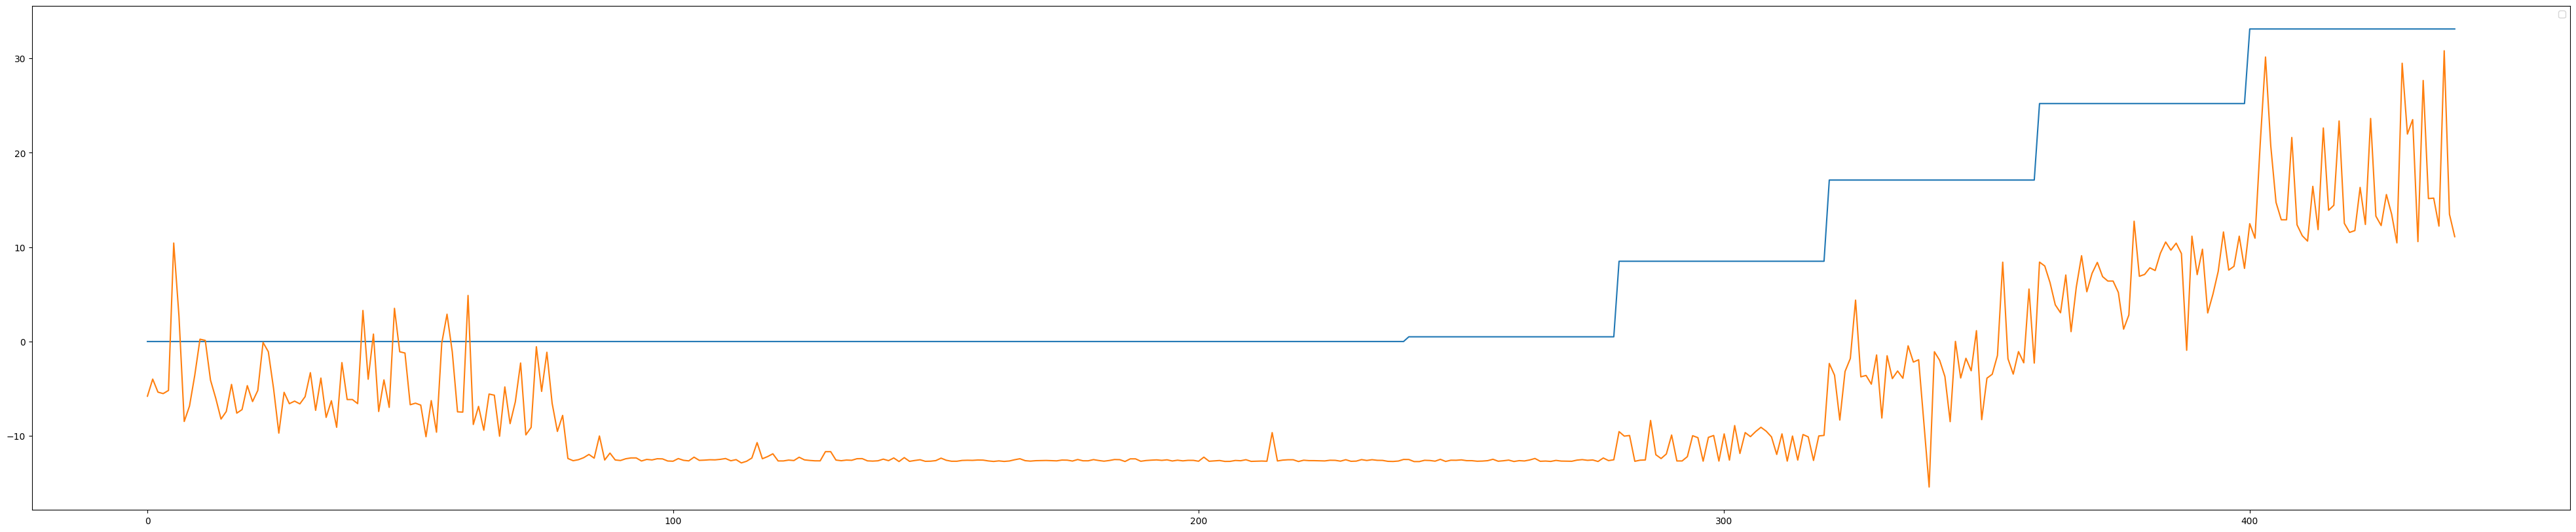

In [43]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (50.0, 10.0) 
plt.plot(Y4.astype(float))
plt.plot(pred4)
plt.legend(fontsize=10)
plt.show()

In [ ]:
X2 = data3.drop(["Unnamed: 0", "磷酸盐-mM", "产物-mM", "底物-mM"], axis=1).values
Y2 = data3["产物-mM"].values

In [9]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.1,
                max_depth = 5, alpha = 5, n_estimators = 400, random_state=1024)

In [10]:
xg_reg.fit(X_train[:-300], y_train[:-300],eval_set = [(X_train[-300:], y_train[-300:])],early_stopping_rounds=3)

/home/lqy/miniforge3/envs/pytorch_/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1588.16874
[1]	validation_0-rmse:1431.27486
[2]	validation_0-rmse:1291.29559
[3]	validation_0-rmse:1162.33048
[4]	validation_0-rmse:1047.22724
[5]	validation_0-rmse:942.98463
[6]	validation_0-rmse:849.11873
[7]	validation_0-rmse:764.95820
[8]	validation_0-rmse:690.25402
[9]	validation_0-rmse:621.84590
[10]	validation_0-rmse:560.14589
[11]	validation_0-rmse:505.12784
[12]	validation_0-rmse:455.54493
[13]	validation_0-rmse:410.10348
[14]	validation_0-rmse:370.05534
[15]	validation_0-rmse:333.37327
[16]	validation_0-rmse:300.80909
[17]	validation_0-rmse:271.86094
[18]	validation_0-rmse:245.37302
[19]	validation_0-rmse:221.81541
[20]	validation_0-rmse:200.56344
[21]	validation_0-rmse:181.01909
[22]	validation_0-rmse:163.61493
[23]	validation_0-rmse:147.83238
[24]	validation_0-rmse:133.74741
[25]	validation_0-rmse:121.48918
[26]	validation_0-rmse:110.12323
[27]	validation_0-rmse:100.29210
[28]	validation_0-rmse:91.08078
[29]	validation_0-rmse:82.75615
[30]	validation_0

XGBRegressor(alpha=5, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [11]:
predictions = xg_reg.predict(X_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


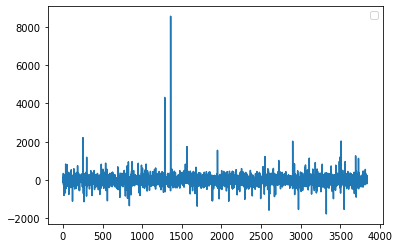

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (50.0, 10.0) 
# plt.plot(predictions[:,0], label = 'predictions')
# plt.plot(y_test[:,0], label = 'y_test')
plt.plot(predictions[:,0] - y_test[:,0])
plt.legend(fontsize=10)
plt.show()

# Day2

In [16]:
data2 = pd.read_csv("day/DAY2.csv")

In [21]:
U2 = data2.drop(["wavenumbers"], axis=1).values

In [22]:
U2 = pca.transform(U2)

In [24]:
X2 = np.concatenate((U2[1:-1], U2[:-2]), axis=-1)
Y2 = U2[2:]

In [32]:
pred2 = xg_reg.predict(X2)

In [49]:
detal2 = pred2 - Y2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


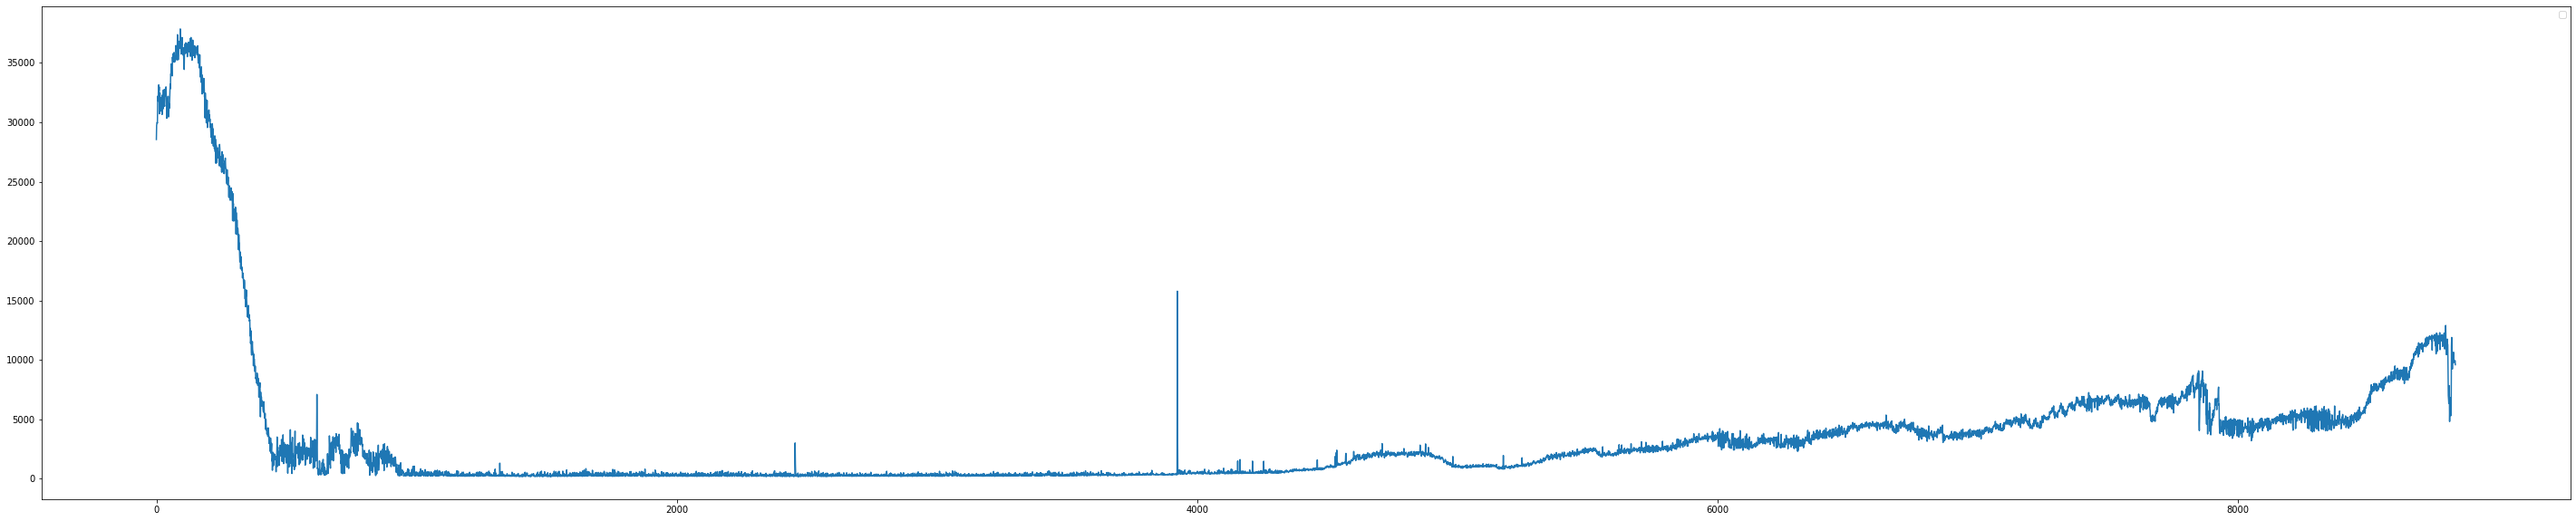

In [50]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (50.0, 10.0) 
plt.plot(np.sum((detal2)**2, axis=-1)**0.5)
plt.legend(fontsize=10)
plt.show()

# day1

In [34]:
data_1 = pd.read_csv("day/data1.csv")

In [43]:
t_idx = []
for t in data_1["0"].values:
    t_idx.append(np.where(data["wavenumbers"].values==t)[0])

In [46]:
t_idx = np.array(t_idx).reshape(-1)

In [47]:
data["wavenumbers"].values[t_idx]

array([20221228025729, 20221228025740, 20221228025751, 20221228025802,
       20221228025813, 20221228025824, 20221228025835, 20221228025846,
       20221228025857, 20221228025908, 20221228025919, 20221228025930,
       20221228025941, 20221228025952, 20221228030003, 20221228030014,
       20221228030025, 20221228030036, 20221228030047, 20221228030058,
       20221228045606, 20221228045617, 20221228045628, 20221228045639,
       20221228045650, 20221228045702, 20221228045713, 20221228045724,
       20221228045735, 20221228045746, 20221228045757, 20221228045808,
       20221228045819, 20221228045830, 20221228045841, 20221228045852,
       20221228045903, 20221228045914, 20221228045925, 20221228045936,
       20221228065539, 20221228065550, 20221228065601, 20221228065612,
       20221228065623, 20221228065634, 20221228065645, 20221228065656,
       20221228065707, 20221228065718, 20221228065729, 20221228065740,
       20221228065751, 20221228065802, 20221228065813, 20221228065824,
      

In [19]:
X_1 = data2.drop(["Unnamed: 0", "磷酸根", "底物"], axis=1).values
Y2 = data2["产物-"].values

In [21]:
pred_X2 = xg_reg.predict(X2)

In [24]:
res_Y2 = Y2 - pred_X2

In [26]:
xg_reg2 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.1,
                max_depth = 5, alpha = 5, n_estimators = 400, random_state=1024)

In [27]:
xg_reg2.fit(X2[:-30], res_Y2[:-30],eval_set = [(X2[-30:], res_Y2[-30:])],early_stopping_rounds=50)

[0]	validation_0-rmse:27.71315
[1]	validation_0-rmse:25.32272
[2]	validation_0-rmse:23.16373
[3]	validation_0-rmse:21.36484
[4]	validation_0-rmse:19.58910
[5]	validation_0-rmse:18.11783
[6]	validation_0-rmse:16.65657
[7]	validation_0-rmse:15.45352
[8]	validation_0-rmse:14.25037
[9]	validation_0-rmse:13.16380
[10]	validation_0-rmse:12.27203
[11]	validation_0-rmse:11.37722
[12]	validation_0-rmse:10.64815
[13]	validation_0-rmse:9.99069
[14]	validation_0-rmse:9.31713
[15]	validation_0-rmse:8.70892
[16]	validation_0-rmse:8.15974
[17]	validation_0-rmse:7.71862
[18]	validation_0-rmse:7.14339
[19]	validation_0-rmse:6.72893
[20]	validation_0-rmse:6.35475


/home/lqy/miniforge3/envs/pytorch_/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:5.90424
[22]	validation_0-rmse:5.63119
[23]	validation_0-rmse:5.24697
[24]	validation_0-rmse:4.89800
[25]	validation_0-rmse:4.69430
[26]	validation_0-rmse:4.39610
[27]	validation_0-rmse:4.12534
[28]	validation_0-rmse:3.94419
[29]	validation_0-rmse:3.71507
[30]	validation_0-rmse:3.50711
[31]	validation_0-rmse:3.31837
[32]	validation_0-rmse:3.21121
[33]	validation_0-rmse:3.04987
[34]	validation_0-rmse:2.94321
[35]	validation_0-rmse:2.96154
[36]	validation_0-rmse:2.83219
[37]	validation_0-rmse:2.75033
[38]	validation_0-rmse:2.79560
[39]	validation_0-rmse:2.79080
[40]	validation_0-rmse:2.69661
[41]	validation_0-rmse:2.71135
[42]	validation_0-rmse:2.73711
[43]	validation_0-rmse:2.68769
[44]	validation_0-rmse:2.61880
[45]	validation_0-rmse:2.58964
[46]	validation_0-rmse:2.52994
[47]	validation_0-rmse:2.55105
[48]	validation_0-rmse:2.49970
[49]	validation_0-rmse:2.50726
[50]	validation_0-rmse:2.46294
[51]	validation_0-rmse:2.46972
[52]	validation_0-rmse:2.44527
[53]	val

XGBRegressor(alpha=5, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [37]:
data3 = pd.read_csv("day/lday4.csv")
X3 = data3.drop(["Unnamed: 0", "磷酸盐", "底物"], axis=1).values
Y3 = data3["产物"].values

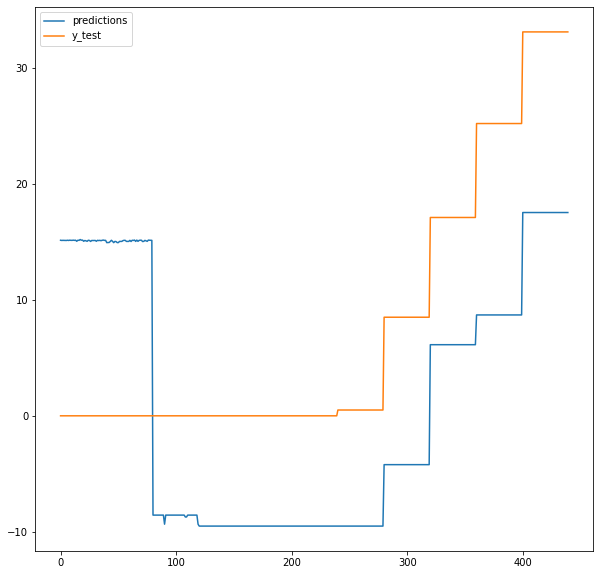

In [38]:
predictions = xg_reg.predict(X3) + xg_reg2.predict(X3)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 10.0) 
plt.plot(predictions, label = 'predictions')
plt.plot(Y3, label = 'y_test')
plt.legend(fontsize=10)
plt.show()

In [29]:
xg_reg.fit(X_train[:-30], y_train[:-30],eval_set = [(X_train[-30:], y_train[-30:])],early_stopping_rounds=50)

[0]	validation_0-rmse:44.65855
[1]	validation_0-rmse:40.28227
[2]	validation_0-rmse:36.28676
[3]	validation_0-rmse:32.81339
[4]	validation_0-rmse:29.61069
[5]	validation_0-rmse:26.83602
[6]	validation_0-rmse:24.21303
[7]	validation_0-rmse:21.85762
[8]	validation_0-rmse:19.69694
[9]	validation_0-rmse:17.83223
[10]	validation_0-rmse:16.09788
[11]	validation_0-rmse:14.54057
[12]	validation_0-rmse:13.13835
[13]	validation_0-rmse:11.81977
[14]	validation_0-rmse:10.68865
[15]	validation_0-rmse:9.65612
[16]	validation_0-rmse:8.75674
[17]	validation_0-rmse:7.92917
[18]	validation_0-rmse:7.20008
[19]	validation_0-rmse:6.53283
[20]	validation_0-rmse:5.95075


/home/lqy/miniforge3/envs/pytorch_/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:5.41362
[22]	validation_0-rmse:4.91167
[23]	validation_0-rmse:4.48058
[24]	validation_0-rmse:4.03259
[25]	validation_0-rmse:3.68087
[26]	validation_0-rmse:3.37294
[27]	validation_0-rmse:3.09352
[28]	validation_0-rmse:2.83035
[29]	validation_0-rmse:2.57376
[30]	validation_0-rmse:2.34449
[31]	validation_0-rmse:2.16361
[32]	validation_0-rmse:1.97046
[33]	validation_0-rmse:1.80230
[34]	validation_0-rmse:1.66998
[35]	validation_0-rmse:1.55099
[36]	validation_0-rmse:1.43078
[37]	validation_0-rmse:1.32979
[38]	validation_0-rmse:1.24991
[39]	validation_0-rmse:1.18302
[40]	validation_0-rmse:1.11215
[41]	validation_0-rmse:1.05799
[42]	validation_0-rmse:1.01012
[43]	validation_0-rmse:0.96037
[44]	validation_0-rmse:0.91672
[45]	validation_0-rmse:0.87821
[46]	validation_0-rmse:0.84653
[47]	validation_0-rmse:0.82216
[48]	validation_0-rmse:0.79640
[49]	validation_0-rmse:0.77821
[50]	validation_0-rmse:0.75827
[51]	validation_0-rmse:0.74581
[52]	validation_0-rmse:0.73243
[53]	val

XGBRegressor(alpha=5, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)